<a href="https://colab.research.google.com/github/imymemineyay/Study_Python/blob/main/Python_dojang(Unit46_47).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Unit 46 실전예제 : 웹의 데이터로 그래프 그리기**


In [1]:
import requests # 웹 페이지의 HTML을 가져오는 모듈
from bs4 import BeautifulSoup # HTML을 파싱하는 모듈


# 웹 페이지를 가져온 뒤 BeautifulSoup 객체를 만듦
response = requests.get('https://pythondojang.bitbucket.io/weather/observation/currentweather.html')
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table',{ 'class': 'table_develop3'}) # BeautifulSoup 클래스로 만든 soup객체로 태그 찾음
data = [] # 데이터를 저장할 리스트 생성
for tr in table.find_all('tr'): # 모든 <tr> 태그를 찾아 반복(각 지점의 데이터를 가져옴)
  tds = list(tr.find_all('td')) # 

  for td in tds: # <td>태크 리스트 반복 (각 날씨 값을 가져옴)
    if td.find('a'):
      point = td.find('a').text
      temperature = tds[5].text # 기온 
      humidity = tds[9].text # 습도 
      data.append([point, temperature, humidity])

data 

[['서울', '25.6', '30'],
 ['백령도', '18.4', '62'],
 ['인천', '20.8', '54'],
 ['수원', '25.0', '41'],
 ['동두천', '24.9', '34'],
 ['파주', '25.1', '39'],
 ['강화', '20.0', '56'],
 ['양평', '25.5', '32'],
 ['이천', '25.6', '28'],
 ['북춘천', '24.6', '36'],
 ['북강릉', '19.9', '56'],
 ['울릉도', '16.8', '77'],
 ['속초', '19.1', '75'],
 ['철원', '23.9', '37'],
 ['대관령', '17.9', '49'],
 ['춘천', '25.7', '39'],
 ['강릉', '22.7', '41'],
 ['동해', '19.5', '77'],
 ['원주', '23.4', '36'],
 ['영월', '24.2', '34'],
 ['인제', '24.3', '31'],
 ['홍천', '25.4', '25'],
 ['태백', '19.6', '43'],
 ['정선군', '23.0', '32'],
 ['서산', '23.6', '49'],
 ['청주', '24.3', '33'],
 ['대전', '25.1', '37'],
 ['충주', '24.4', '32'],
 ['추풍령', '23.0', '35'],
 ['홍성(예)', '24.3', '46'],
 ['제천', '24.2', '32'],
 ['보은', '23.7', '28'],
 ['천안', '23.5', '35'],
 ['보령', '21.4', '56'],
 ['부여', '23.9', '37'],
 ['금산', '23.7', '30'],
 ['전주', '24.9', '44'],
 ['광주', '24.0', '35'],
 ['목포', '22.8', '51'],
 ['여수', '22.8', '49'],
 ['흑산도', '19.2', '93'],
 ['군산', '21.8', '55'],
 ['완도', '23.2', '45'],

In [2]:
with open('weather.csv','w') as file:
  file.write('point, temperature, humidity\n')
  for i in data:
    file.write('{0},{1},{2}\n'.format(i[0],i[1],i[2])) # 지점, 온도, 습도를 중 단위로 저장

- 데이터로 그래프 그리기

In [3]:
# %matplotlib inline을 설정하면 matplotlib.pyplot의 show 함수를 호출하지 않아도
# 주피터 노트북 안에서 그래프가 표시됨
%matplotlib inline
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
 
# csv 파일을 읽어서 DataFrame 객체로 만듦. 인덱스 컬럼은 point로 설정, 인코딩은 euc-kr로 설정
df = pd.read_csv('weather.csv', index_col='point', encoding='utf-8')
df

,temperature,humidity
point,,
서울,25.6,30
백령도,18.4,62
인천,20.8,54
수원,25.0,41
동두천,24.9,34
...,...,...
합천,25.1,32
밀양,24.7,34
산청,24.8,41


In [4]:
# 특별시, 광역시만 모아서 DataFrame 객체로 만듦
city_df = df.loc[['서울', '인천', '대전', '대구', '광주', '부산', '울산']]
city_df    # city_df 표시

,temperature,humidity
point,,
서울,25.6,30
인천,20.8,54
대전,25.1,37
대구,25.7,31
광주,24.0,35
부산,20.2,66
울산,19.7,70


In [5]:
df.loc['서울']

 temperature    25.6
 humidity       30.0
Name: 서울, dtype: float64

In [6]:
df.loc[['서울', '부산']]

,temperature,humidity
point,,
서울,25.6,30
부산,20.2,66


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

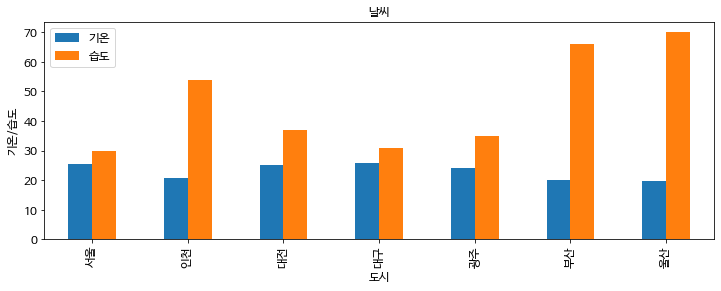

In [7]:
# 한글 깨짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font',family = 'NanumBarunGothic')

# 마이너스 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = city_df.plot(kind='bar', title='날씨', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('도시', fontsize=12)          # x축 정보 표시
ax.set_ylabel('기온/습도', fontsize=12)     # y축 정보 표시
ax.legend(['기온', '습도'], fontsize=12)    # 범례 지정

## **Unit 47 부록**


41.1 비트 연산자 사용하기

- 10진수와 2진수 변환하기 

10진수를 2진수로 된 문자열로 변환할 때는 bin 사용

반대로 2진수에서 10진수로는 입력 즉시 변환됨

In [9]:
bin(13) # 10진수 13을 2진수로 변환

'0b1101'

In [10]:
0b1101 # 2진수 1101을 10진수로 변환

13

- int('2진수문자열', 2)

In [11]:
int('1101',2)

13

비트 논리 연산자

a & b : and

a | b : or

a ^ b : xor

~x : not

- 비트 논리 연산자는 각 자릿수를 연산하여 결과를 만듦

In [12]:
0b1101 & 0b101

5

- 시프트 연산자 사용하기

시프트 연산자 : 비트의 위치를 이동시키는 연산자

<< , >> : 비트를 이동시킬 횟수를 지정함

<< : 비트를 왼쪽으로 이동

>> : 비트를 오른쪽으로 이동

In [14]:
0b0011 << 2 # 비트를 왼쪽으로 2번 이동

12

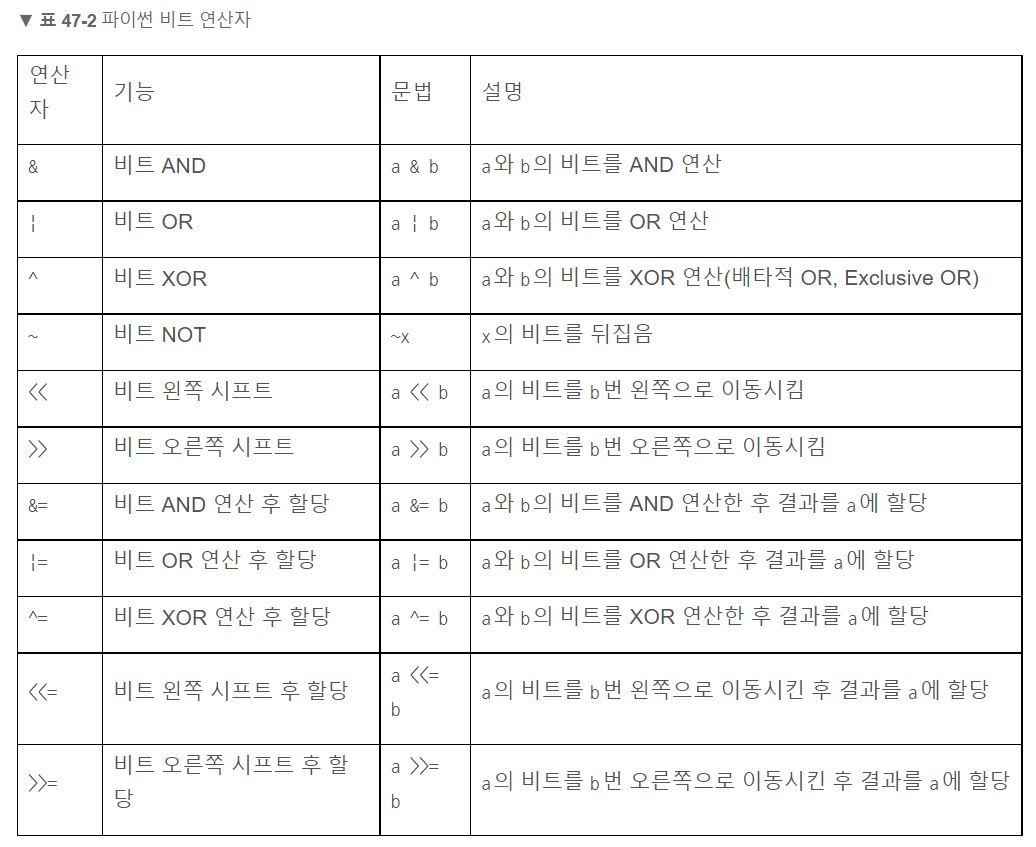

47.2 연산자 우선순위

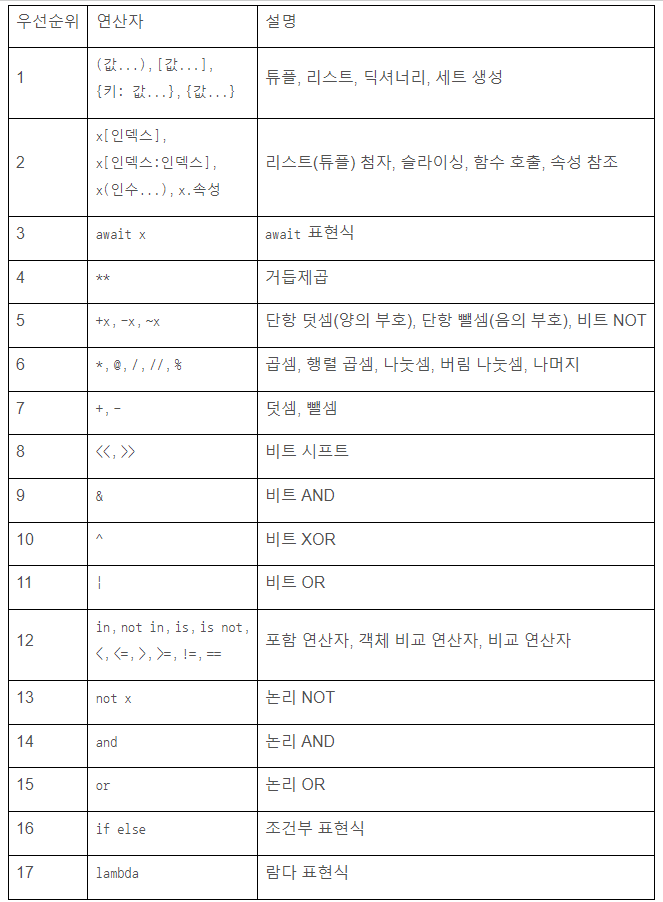

47.3 bytes, bytearray 사용하기

bytes : 1 바이트 단위의 값을 연속적으로 저장하는 시퀀스 자료형

bytes(길이) : 정해진 길이만큼 0으로 채워진 바이트 객체를 생성

bytes(반복가능한객체) : 반복 가능한 객체로 바이트 객체를 생성

bytes(바이트객체) : 바이트 객체로 바이트 객체를 생성


In [15]:
bytes(10)    # 0이 10개 들어있는 바이트 객체 생성

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [16]:
bytes(b'hello')    # 바이트 객체로 바이트 객체 생성

b'hello'

bytearray : 1 바이트 단위의 값을 연속적으로 저장하는 시퀀스 자료형

bytes : 요소 변경 불가

bytearray : 요소를 변경할 수 있음

bytearray() : 빈 바이트 배열 객체를 생성

bytearray(길이) : 정해진 길이만큼 0으로 채워진 바이트 객체를 생성

bytearray(반복가능한객체) : 반복가능한객체로 바이트 배열 객체를 생성

bytearray(바이트객체) : 바이트 객체로 바이트 배열 객체를 생성



bytearray의 요소에 값을 할당할 때는 정수(int)를 할당해야 합니다. 

문자를 넣고 싶으면 ord를 사용하여 문자의 ASCII 코드(정수)를 넣어주어야 합니다.

In [17]:
x = bytearray(b'hello')
x[0] = ord('a')    # ord는 문자의 ASCII 코드를 반환
x

bytearray(b'aello')

- 바이트 자료형과 인코딩

문자열의 기본 인코딩 : UTF-8

b'hello'와 같이 문자열을 바이트 객체로 만들면 각 문자를 ASCII코드로 저장

보통 문자열을 UTF-8이 아닌 ASCII코드로 처리하고 싶을 때 바이트 객체 사용

문자열을 바이트 객체로 바꾸려면

        문자열.encode()

In [18]:
'hello'.encode()     # str을 bytes로 변환

b'hello'

In [19]:
'안녕'.encode('euc-kr')

b'\xbe\xc8\xb3\xe7'

바이트 객체를 문자열로 바꾸려면

        바이트.decode()

In [20]:
b'hello'.decode()    # bytes를 str로 변환

'hello'

    바이트객체.decode('인코딩')

In [21]:
x = '안녕'.encode('euc-kr')
x.decode('euc-kr')

'안녕'

bytes, bytearray는 인코딩을 지정하여 객체를 생성 가능


        bytes(값, encoding = '인코딩')
        bytearray(값, encoding = '인코딩')

In [22]:
bytes('안녕', encoding='euc-kr')

b'\xbe\xc8\xb3\xe7'

47.4 닐찌/시간 모듈 활용하기

- time모듈로 현재 시간 구하기

In [23]:
import time
time.time()

1672902570.775151

- 날짜와 시간 형태로 변환하기

        time.localtime(초)

In [24]:
time.localtime(time.time())

time.struct_time(tm_year=2023, tm_mon=1, tm_mday=5, tm_hour=7, tm_min=13, tm_sec=49, tm_wday=3, tm_yday=5, tm_isdst=0)

tm_wday : 요일(월요일 - 일요일, 0 - 6)

tm_yday : 1월 1일부터 경과한 일수

tm_isdst : 서머타임 여부

time.localtime으로 만든 객체는 time.strftime 함수를 사용하여 원하는 날짜/시간 포맷으로 출력 가능

      time.strftime('포맷', 시간객체)

In [25]:
time.strftime('%Y-%m-%d', time.localtime(time.time()))

'2023-01-05'

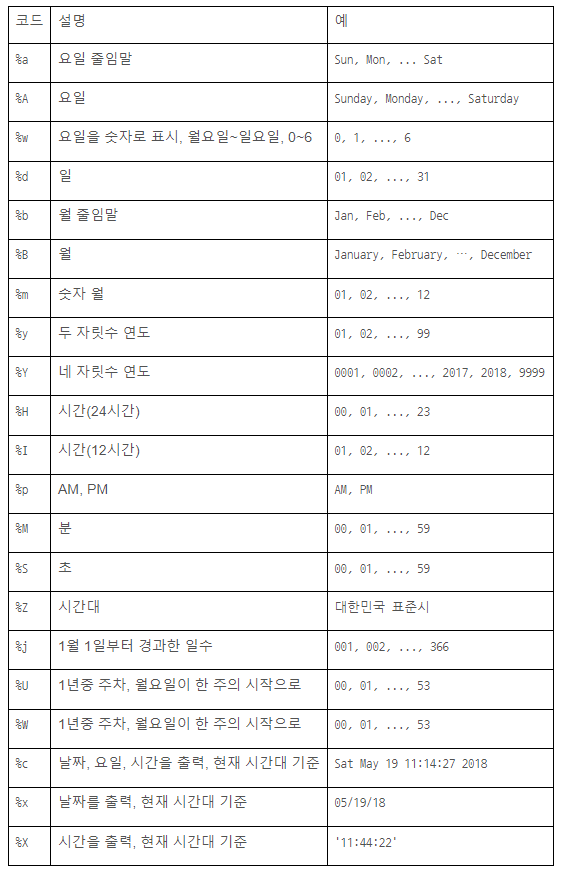

- datetime 모듈로 현재 날짜와 시간 구하기

      datetime.datetime.today()
      datetime.datetime.now(시간대객체)
      

In [27]:
import datetime
datetime.datetime.today()

datetime.datetime(2023, 1, 5, 7, 18, 0, 795038)

In [28]:
pip install pytz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- 특정 날짜와 시간으로 객체 만들기

      datetime.datetime(year,month,day,hour=0, minute = 0, second = 0, microsecond = 0)

In [31]:
d = datetime.datetime(2018, 5, 19)
d

datetime.datetime(2018, 5, 19, 0, 0)

- 문자열로 날짜/ 시간 객체 만들기

          datetime.datetime.strptime('날짜문자열', '포맷')

In [32]:
d = datetime.datetime.strptime('2018-05-19', '%Y-%m-%d')
d

datetime.datetime(2018, 5, 19, 0, 0)

- 날짜/시간 객체를 문자열로 만들기
          datetime객체.strftime('포맷')

In [33]:
d.strftime('%Y-%m-%d')

'2018-05-19'

- 날짜와 시간 속성에 접근하기

datetime.datetime 객체는 연( year), 월(month), 일(day), 시(hour), 분(minute), 초(second), 마이크로초(microsecond) 속성을 따로 가져올 수 있음

- 날짜와 시간 차이 계산하기

          datetime.timedelta(days=0, seconds=0, microseconds=0, milliseconds=0,
                   minutes=0, hours=0, weeks=0)

47.5 내장함수

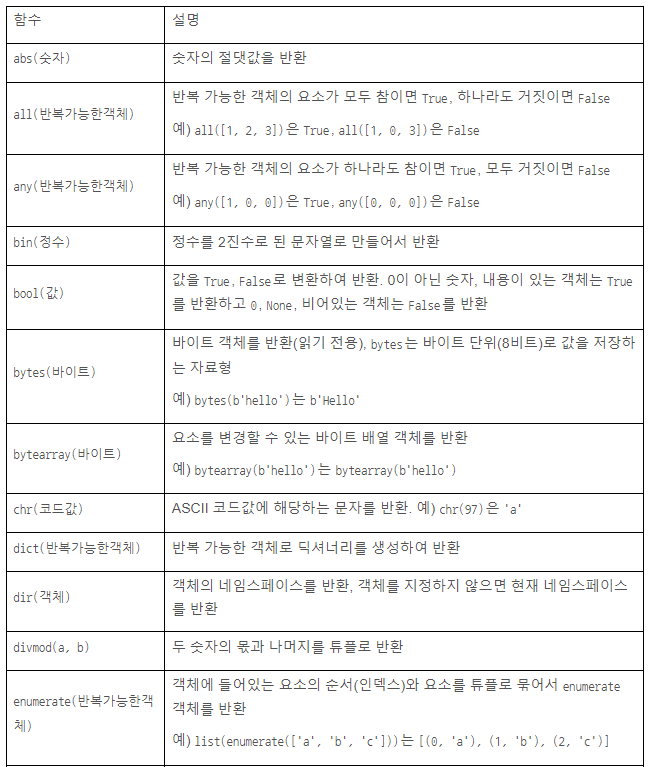

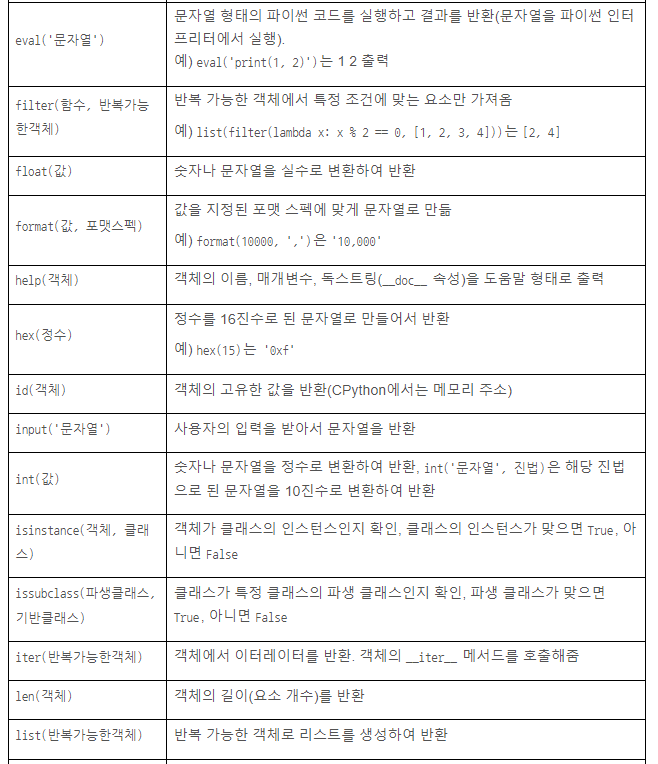

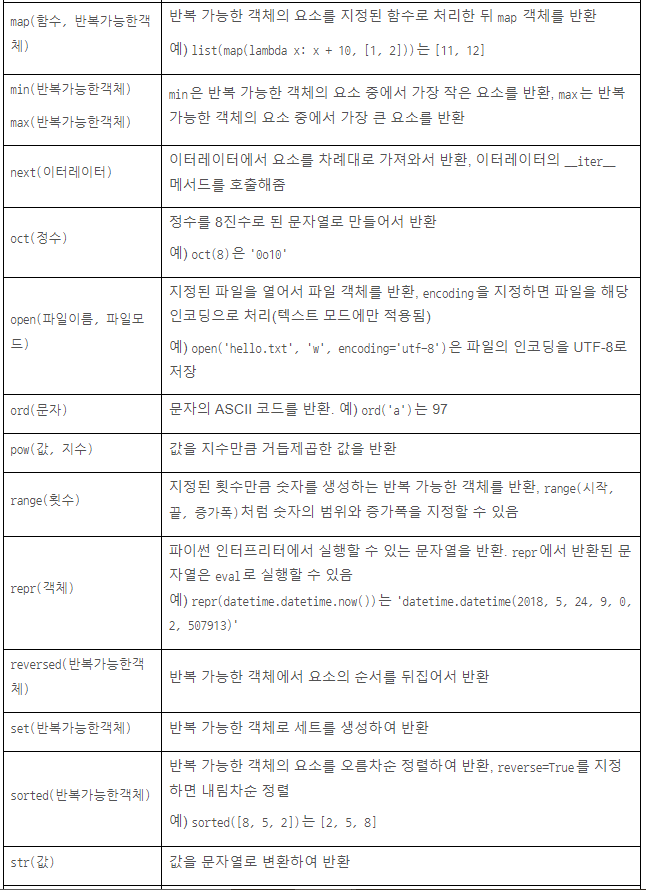

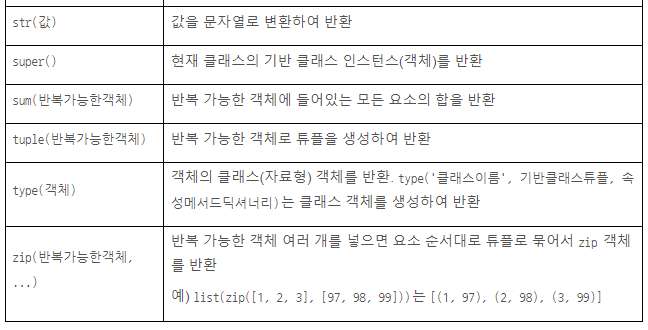

47.6 이스케이프 시퀀스

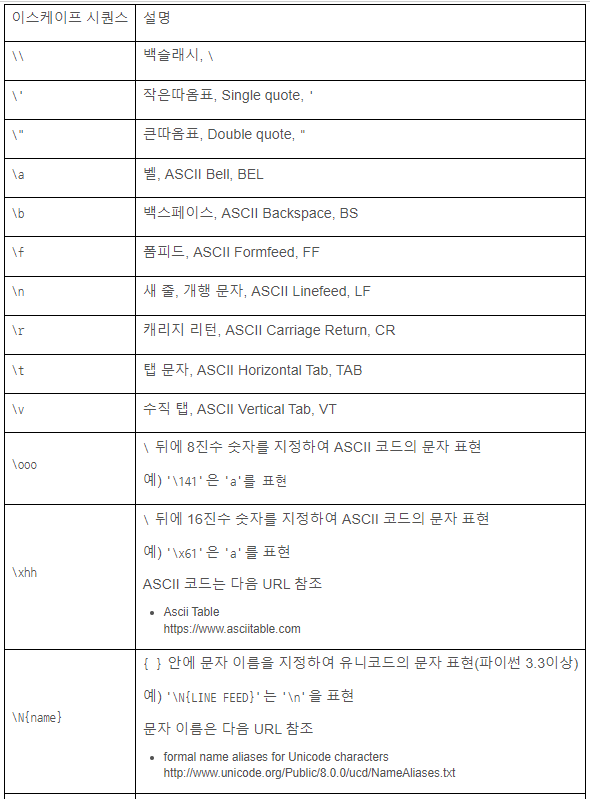

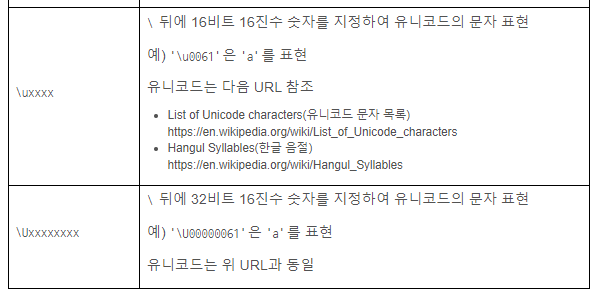

47.7 실수 값의 오차

실수를 근삿값으로 표현하면서 발생하는 문제를 부동소수점 반올림 오차라고 함

실수를 비교할 때는 연산한 값과 비교할 값의 차이를 구한 뒤 sys.float_info.epsilon보다 작거나 같은지 판단해야 함

In [38]:
import math, sys
x = 0.1 + 0.2
math.fabs(x - 0.3) <= sys.float_info.epsilon


True

여기서 sys.float_info.epsilon에 저장된 값을 머신 엡실론(machine epsilon)이라고 부르고,

어떤 실수를 가장 가까운 부동소수점 실수로 반올림했을 때 상대 오차는 항상 머신 엡실론이하

즉, 머신 엡실론은 반올림 오차의 상한값이며 연산한 값과 비교할 값의 차이가 머신 엡실론보다 작거나 같다면 두 실수는 같은 값이라 할 수 있다.

파이썬 3.5 이상부터는 두 실수가 같은지 판단할 때 math.isclose 함수를 사용

In [39]:
import math
math.isclose(0.1 + 0.2, 0.3)

True

- Decimal으로 정확한 자릿수 표현

반올림 오차가 없는 고정소수점을 사용하려면 decimal모듈의 Decimal을 사용하면 됨

Decimal은 숫자를 10진수로 처리하여 정확한 소수점 자릿수를 표현

In [40]:
from decimal import Decimal
Decimal('0.1') + Decimal('0.2')

Decimal('0.3')

- Fraction으로 분수 표현

순환소수 : 고정소수점이라도 정확히 표현 불가

이때 fractions 모듈의 Fraction을 사용하여 분수로 표현하면 됨

In [41]:
from fractions import Fraction
Fraction('10/3')

Fraction(10, 3)

나머지 부록은 유튜브로 시청